# Cartesian Model
## Nightingale Corona

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ber, bei, ker, kei
from scipy.optimize import curve_fit
from scipy.signal import convolve

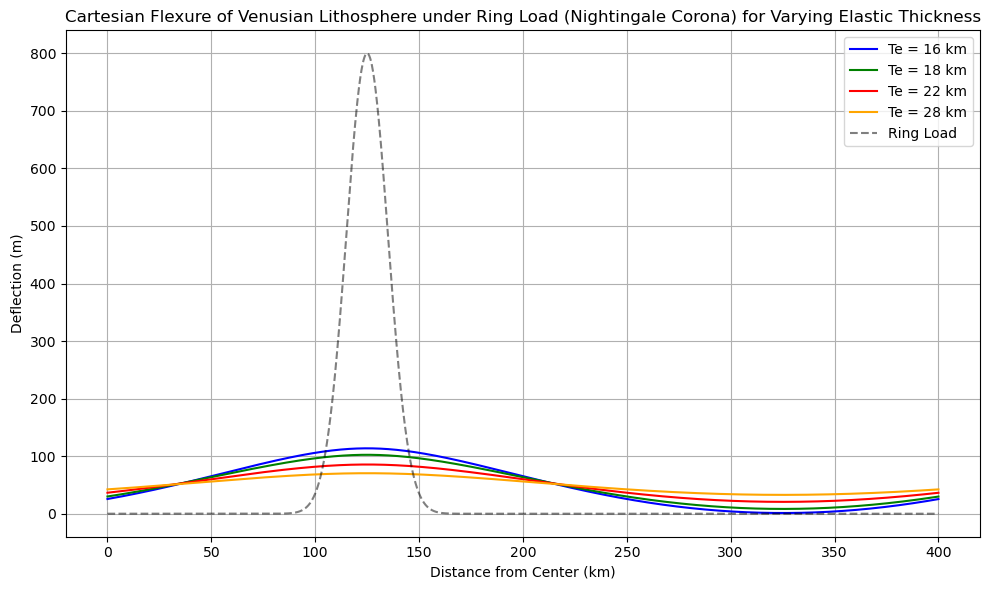

In [20]:
# Constants
rho_c = 2800       # Crust density (kg/m^3)
rho_m = 3000       # Mantle density (kg/m^3)
g = 8.87           # Venus gravity (m/s^2)
E = 6.5e10          # Young's modulus (Pa)
nu = 0.25          # Poisson's ratio

# Flexural rigidity from elastic thickness
def D_from_Te(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Define spatial domain
x = np.linspace(0, 400e3, 2000)
dx = x[1] - x[0]

# Define a "ring" as two Gaussian loads
def ring_load(x, x0_km=125, width_km=10, height_m=800):
    x0 = x0_km * 1e3
    sigma = width_km * 1e3
    return height_m * (np.exp(-((x - x0)**2) / (2 * sigma**2)) + 
                       np.exp(-((x + x0)**2) / (2 * sigma**2)))

# Load profile
load = ring_load(x)

# FFT wave numbers
k = 2 * np.pi * np.fft.fftfreq(x.size, d=dx)
k[0] = 1e-10  # avoid division by zero

load_fft = np.fft.fft(load)

# Try different elastic thicknesses
Te_values = [16, 18, 22, 28] # in km
colors = ['blue', 'green', 'red', 'orange']

# Plot
plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    D = D_from_Te(Te)
    denom = 1 + (D * k**4) / ((rho_m - rho_c) * g)
    w_fft = load_fft / denom
    w = np.real(np.fft.ifft(w_fft))
    plt.plot(x / 1e3, w, label=f'Te = {Te} km', color=color)

plt.plot(x / 1e3, load, 'k--', label='Ring Load', alpha=0.5)
plt.title("Cartesian Flexure of Venusian Lithosphere under Ring Load (Nightingale Corona) for Varying Elastic Thickness")
plt.xlabel("Distance from Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


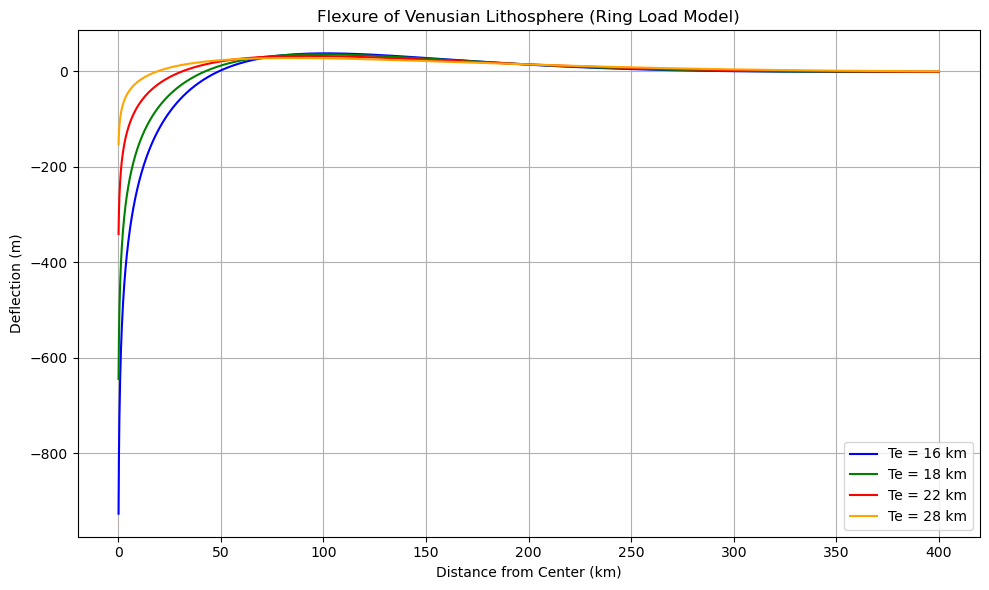

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ber, bei, ker, kei

# Numerical derivatives for ber' and bei'
def berp(x):
    h = 1e-5
    return (ber(x + h) - ber(x - h)) / (2 * h)

def beip(x):
    h = 1e-5
    return (bei(x + h) - bei(x - h)) / (2 * h)

# Constants
rho_c = 2800
rho_m = 3000
g = 8.87
E = 6.5e10
nu = 0.25
delta_rho = rho_m - rho_c

def D_from_Te(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Deflection function
def ringFlexure(r, Te_km, a=125e3, dela=10e3, p0=1e6):
    D = D_from_Te(Te_km)
    alpha = (D / (delta_rho * g))**0.25

    r_scaled = r / alpha
    a_scaled = a / alpha
    da_scaled = dela / alpha

    # c1 and c2 using derivatives
    c1 = (a_scaled * berp(a_scaled) - (a_scaled - da_scaled) * berp(a_scaled - da_scaled))
    c2 = ((a_scaled - da_scaled) * beip(a_scaled - da_scaled) - a_scaled * beip(a_scaled))

    w = (p0 / (delta_rho * g)) * (c1 * ker(r_scaled) + c2 * kei(r_scaled))
    return w

# Radial domain
r = np.linspace(0, 400e3, 2000)  # r >= a

# Test different Te
Te_values = [16, 18, 22, 28]
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    w = ringFlexure(r, Te)
    plt.plot(r / 1e3, w, label=f'Te = {Te} km', color=color)

plt.title("Flexure of Venusian Lithosphere (Ring Load Model)")
plt.xlabel("Distance from Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



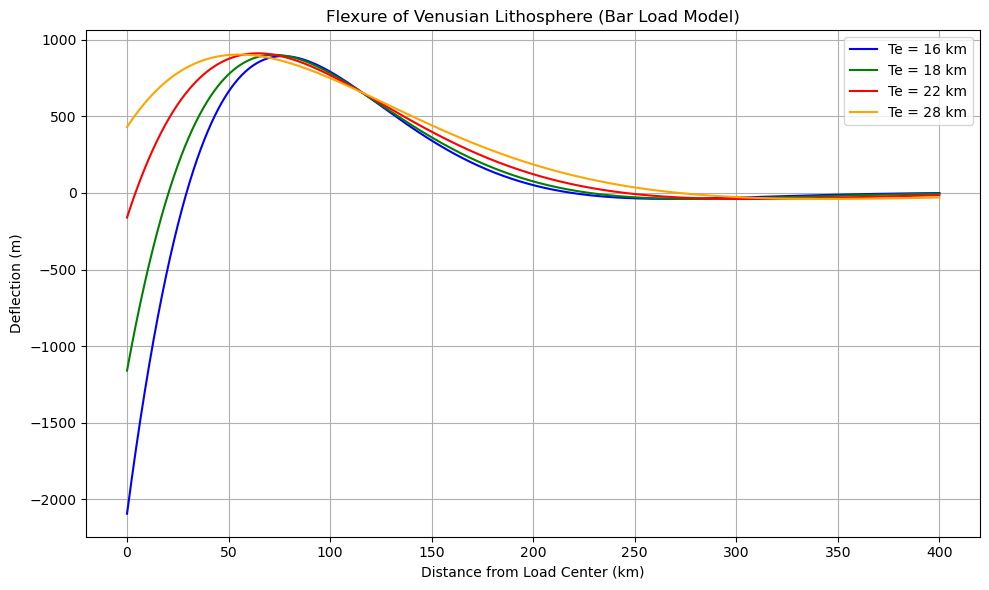

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho_c = 2800
rho_m = 3000
g = 8.87
E = 6.5e10
nu = 0.25
delta_rho = rho_m - rho_c

def D_from_Te(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Deflection function from bar load formula
def barFlexure(x, Te_km, l=125e3, p0=1e6):
    D = D_from_Te(Te_km)
    alpha = (D / (delta_rho * g))**0.25

    x_scaled = x / alpha
    l_scaled = l / alpha

    term1 = np.exp(-(x_scaled - l_scaled)) * np.cos(x_scaled - l_scaled)
    term2 = np.exp(-(x_scaled + l_scaled)) * np.cos(x_scaled + l_scaled)

    w = (p0 / (delta_rho * g)) * (term1 - term2)
    return w

# Spatial domain
x = np.linspace(0, 400e3, 2000)  # symmetric about 0 if desired

# Try different elastic thicknesses
Te_values = [16, 18, 22, 28]
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    w = barFlexure(x, Te)
    plt.plot(x / 1e3, w, label=f'Te = {Te} km', color=color)

plt.title("Flexure of Venusian Lithosphere (Bar Load Model)")
plt.xlabel("Distance from Load Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


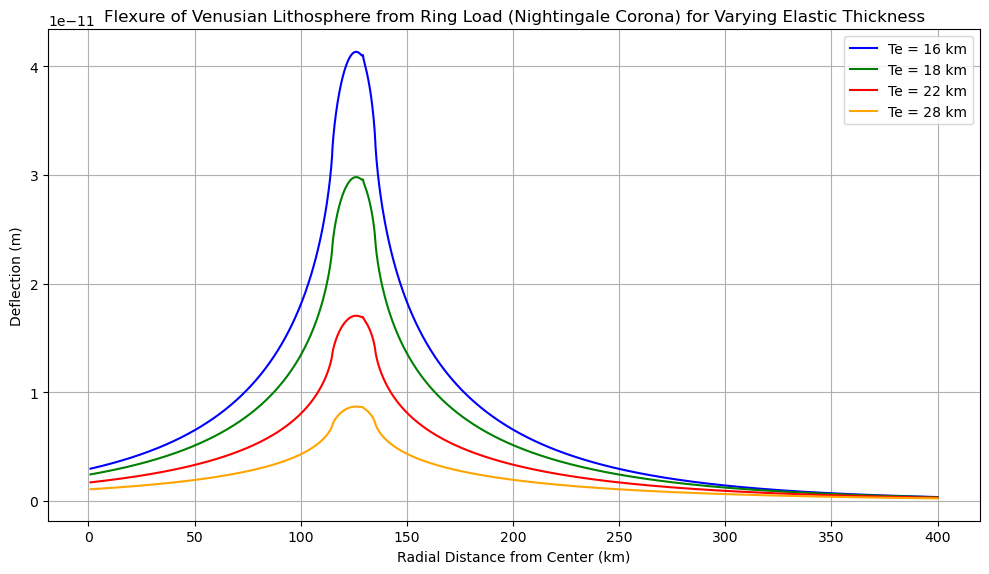

[2.5486222222222223e+22, 3.6288e+22, 6.625422222222223e+22, 1.3659022222222224e+23]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as K_v  # Modified Bessel function of the second kind

# Constants
rho_c = 2800       # Crust density (kg/m^3)
rho_m = 3000       # Mantle density (kg/m^3)
g = 8.87           # Gravity on Venus (m/s^2)
E = 6.5e10           # Young's modulus (Pa)
nu = 0.25          # Poisson's ratio

# Flexural rigidity from elastic thickness
def D_from_Te(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Flexural parameter
def alpha(D):
    return (4 * D / ((rho_m - rho_c) * g))**0.25

# Deflection from a ring load centered at radius r0
def ring_deflection(r, D, Q_ring, r0, dr=5e3):
    """
    r: radial positions to compute deflection at (array)
    D: flexural rigidity
    Q_ring: total load applied in the ring (Nm)
    r0: center radius of the ring (m)
    dr: half-width of the ring (m)
    """
    a = alpha(D)
    # Normalize Q_ring over ring circumference
    ring_circumference = 2 * np.pi * r0
    q = Q_ring / (2 * np.pi * r0 * dr)  # Load per unit length per unit width

    # Numerical integration over the ring
    r_prime = np.linspace(r0 - dr, r0 + dr, 100)
    w = np.zeros_like(r)
    for rp in r_prime:
        dQ = q * 2 * np.pi * rp * (r_prime[1] - r_prime[0])
        w += dQ / (2 * np.pi * D) * K_v(0, np.abs(r - rp) / a)
    return w

# Radial domain
r = np.linspace(1e3, 400e3, 2000)  # from 1 km to 400 km

# Load parameters
Q_ring = 1e12       # Nm, total load applied in the ring
r0 = 125e3          # center of ring at 125 km radius (~250 km wide corona)
dr = 10e3           # ring width ±10 km

# Plate thicknesses to try
Te_values = [16, 18, 22, 28]
colors = ['blue', 'green', 'red', 'orange']
D_vals = []
# Plot
plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    D = D_from_Te(Te)
    D_vals.append(D)
    w = ring_deflection(r, D, Q_ring, r0, dr=dr)
    plt.plot(r / 1e3, w, label=f'Te = {Te} km', color=color)

plt.title("Flexure of Venusian Lithosphere from Ring Load (Nightingale Corona) for Varying Elastic Thickness")
plt.xlabel("Radial Distance from Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(D_vals)

# Possible Chasm Stuff

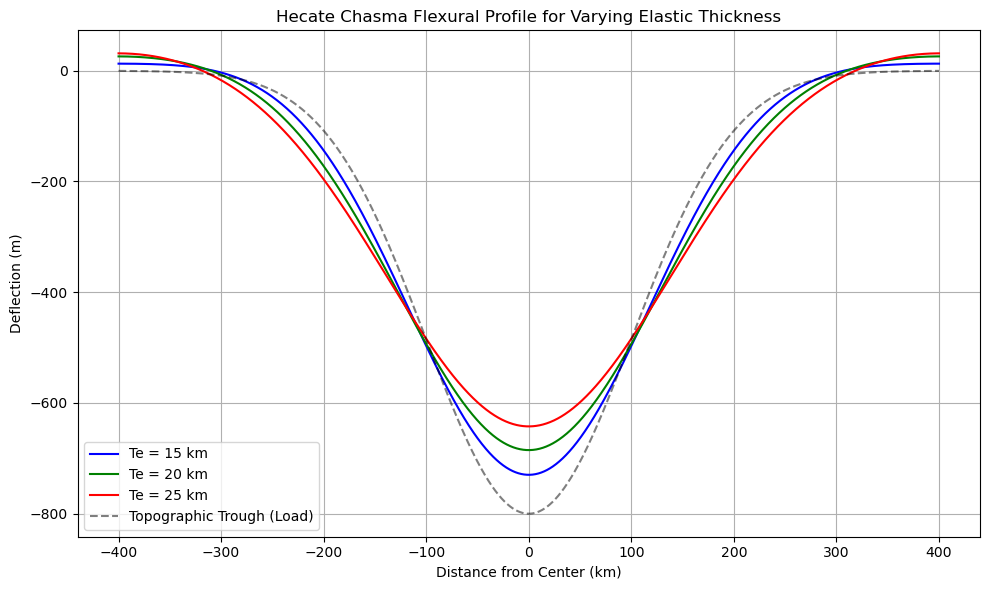

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
rho_c = 2900      # Crust density (kg/m^3)
rho_m = 3300      # Mantle density (kg/m^3)
g = 8.87          # Venus gravity (m/s^2)
E = 7e10          # Young's modulus (Pa)
nu = 0.25         # Poisson's ratio

# Convert elastic thickness (km) to flexural rigidity D (Nm)
def Te_to_D(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Spatial domain
x = np.linspace(-400e3, 400e3, 2000)  # ±400 km
dx = x[1] - x[0]

# Hecate Chasma trough: modeled as a Gaussian depression
load_width = 100e3     # ~200 km wide
load_depth = -800      # ~0.8 km deep depression
load = load_depth * np.exp(-x**2 / (2 * load_width**2))

# FFT setup
k = 2 * np.pi * np.fft.fftfreq(x.size, d=dx)
load_fft = np.fft.fft(load)

# Range of elastic thicknesses from paper
Te_values = [15, 20, 25]  # in km
colors = ['blue', 'green', 'red']

# Plot modeled flexure
plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    D = Te_to_D(Te)
    denom = 1 + (D * k**4) / ((rho_m - rho_c) * g)
    w_fft = load_fft / denom
    w = np.real(np.fft.ifft(w_fft))
    plt.plot(x / 1e3, w, label=f'Te = {Te} km', color=color)

plt.plot(x / 1e3, load, 'k--', label='Topographic Trough (Load)', alpha=0.5)
plt.title("Hecate Chasma Flexural Profile for Varying Elastic Thickness")
plt.xlabel("Distance from Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


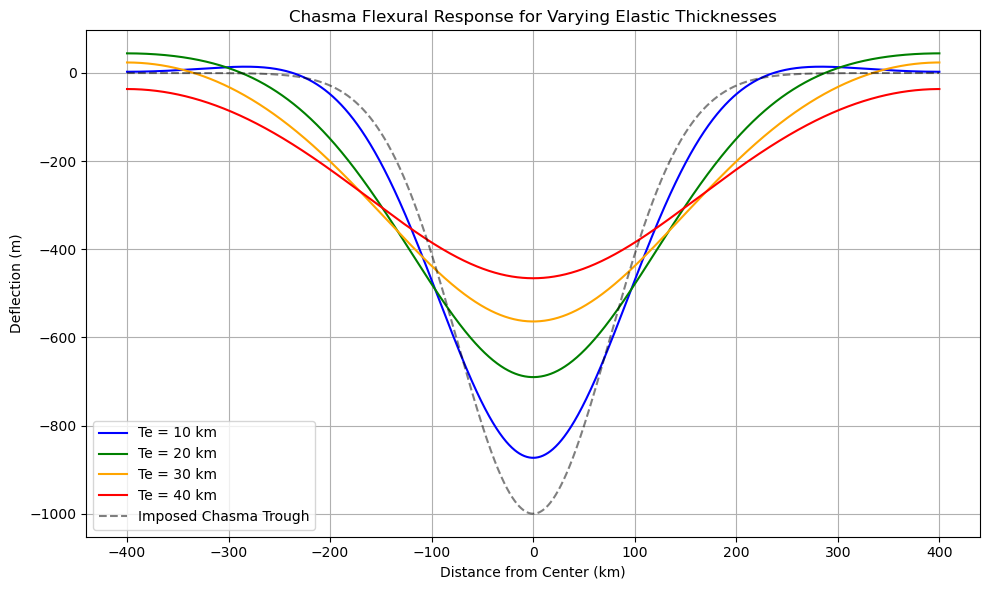

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho_c = 2800      # Crust density (kg/m^3)
rho_m = 3000      # Mantle density (kg/m^3)
g = 8.87          # Venus surface gravity (m/s^2)
E = 7e10          # Young's modulus (Pa)
nu = 0.25         # Poisson's ratio

# Convert Te (km) to flexural rigidity D (Nm)
def Te_to_D(Te_km):
    Te_m = Te_km * 1e3
    return (E * Te_m**3) / (12 * (1 - nu**2))

# Domain
x = np.linspace(-400e3, 400e3, 2000)  # ±400 km
dx = x[1] - x[0]

# Gaussian "trough" load to simulate rift valley
load_width = 75e3     # Width of chasma ~150 km
load_amplitude = -1000  # Negative for depression
load = load_amplitude * np.exp(-x**2 / (2 * load_width**2))

# Fourier transform setup
k = 2 * np.pi * np.fft.fftfreq(x.size, d=dx)
load_fft = np.fft.fft(load)

# Elastic thicknesses to compare
Te_values = [10, 20, 30, 40]  # in km
colors = ['blue', 'green', 'orange', 'red']

# Plotting
plt.figure(figsize=(10, 6))

for Te, color in zip(Te_values, colors):
    D = Te_to_D(Te)
    denom = 1 + (D * k**4) / ((rho_m - rho_c) * g)
    w_fft = load_fft / denom
    w = np.real(np.fft.ifft(w_fft))
    plt.plot(x / 1e3, w, label=f'Te = {Te} km', color=color)

plt.plot(x / 1e3, load, 'k--', label='Imposed Chasma Trough', alpha=0.5)
plt.title("Chasma Flexural Response for Varying Elastic Thicknesses")
plt.xlabel("Distance from Center (km)")
plt.ylabel("Deflection (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
